# Assignment 4: Differentiation and optimization

In [268]:
import sympy as sym # symbolic differentiation
import jax          # algorithmic differentiation
import jax.numpy as np
import matplotlib.pyplot as plt
import math

## Question 1: Differentiation

Function 

$$f(a, b) = \frac 1 b cos(a) \exp \left( - \frac {a^2} {b^2}\right)$$

is given.

1. Derive the partial derivatives of $f(a, b)$ by $a$ and $b$.

    $$\frac {\partial f} {\partial a} = $$
    $$\frac {\partial f} {\partial b} = $$

In [269]:
a = sym.Symbol('a')
b = sym.Symbol('b')
print("df/da =",sym.diff(sym.cos(a)*sym.exp(-(a*a)/(b*b))/b, a))
print()
print("df/db =",sym.diff(sym.cos(a)*sym.exp(-(a*a)/(b*b))/b, b))

df/da = -2*a*exp(-a**2/b**2)*cos(a)/b**3 - exp(-a**2/b**2)*sin(a)/b

df/db = 2*a**2*exp(-a**2/b**2)*cos(a)/b**4 - exp(-a**2/b**2)*cos(a)/b**2


2. Implement the derivatives as Python functions:
  1. according to symbolic expressions.
  2. using algorithmic differentiation (with `jax`).
  
  Compare the accuracy of symbolic and algorithmic differentiation.

In [270]:
#1 
def according_to_symbolic_expressions_a(a,b):
  #-2*a*exp(-a**2/b**2)*cos(a)/b**3 - exp(-a**2/b**2)*sin(a)/b
  x = sym.exp(-a**2/b**2)*sym.cos(a)
  y = sym.exp(-a**2/b**2)*sym.sin(a)
  return -2*a*x/b**3 -y/b

def according_to_symbolic_expressions_b(a, b):
  #2*a**2*exp(-a**2/b**2)*cos(a)/b**4 - exp(-a**2/b**2)*cos(a)/b**2
  x = sym.exp(-a**2/b**2)*sym.cos(a)
  y = sym.exp(-a**2/b**2)*sym.cos(a)
  return 2*a**2*x/b**4 - y/b**2

#2
def f(a,b):
  x = np.cos(a)
  y = np.exp(-(a*a)/(b*b))
  return x*y/b

dfoo_a = jax.grad(f,0)
dfoo_b = jax.grad(f,1)

da_sym = according_to_symbolic_expressions_a
db_sym = according_to_symbolic_expressions_b



In [271]:
#max difference between jax and sym by the Derivative by 'a' parameter, i chosed the 'b' parameter to be 10

y = np.linspace(-20.0, 20.0, 4000)
max_a = 0
max_b = 0
max_diff = 0
b = 10
for a in y:
  if ( max_diff < abs(dfoo_a(a,b) - da_sym(a,b))):
    max_diff = abs(dfoo_a(a,b) - da_sym(a,b))
    max_a = a
    max_b = b

print("a =",max_a)
print("b =",max_b)
print("the accuracy of symbolic and algorithmic differentiation by 'a' is:",float(max_diff))

a = -8.847213
b = 10
the accuracy of symbolic and algorithmic differentiation by 'a' is: 4.390885718213999e-08


In [272]:
#max difference between jax and sym by the Derivative by 'b' parameter, i chosed the 'a' parameter to be 10

y = np.linspace(1.0, 100.0, 4000)
max_a = 0
max_b = 0
max_diff = 0
a = 10
for b in y:
    if ( max_diff < abs(dfoo_b(a,b) - db_sym(a,b))):
      max_diff = abs(dfoo_b(a,b) - db_sym(a,b))
      max_a = a
      max_b = b

print("a =",max_a)
print("b =",max_b)
print("the accuracy of symbolic and algorithmic differentiation by 'b' is:",float(max_diff))

a = 10
b = 7.7336836
the accuracy of symbolic and algorithmic differentiation by 'b' is: 2.3223488461534377e-09


3. Plot 
  * $f(a, 10)$, $\frac {\partial f(a, 10)} {\partial a}$ for range $a \in [-20, 20]$, 
  * $f(10, b)$, $\frac {\partial f(10, b)} {\partial b}$ for range $b \in 1, 100$.

#plotting using jax

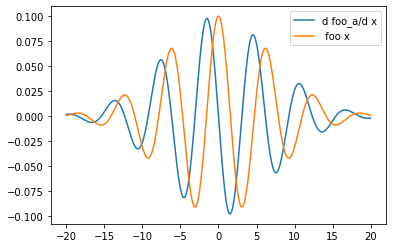

In [5]:
#plotting using jax
x = np.linspace(-20.0, 20.0, 1000)
plt.plot(x, [dfoo_a(x,10) for x in x], label="d foo_a/d x")
plt.plot(x, [f(x,10) for x in x], label=" foo x")
plt.legend()

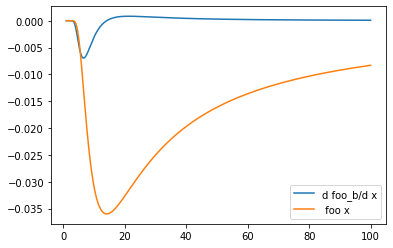

In [36]:
x = np.linspace(1.0, 100.0, 1000)
plt.plot(x, [dfoo_b(10,x) for x in x], label="d foo_b/d x")
plt.plot(x, [f(10,x) for x in x], label=" foo x")
plt.legend()

#plotting using sym

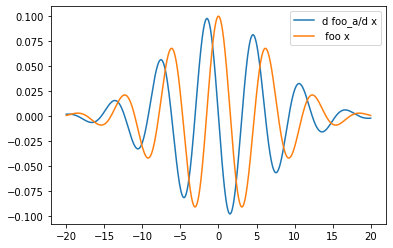

In [37]:
#plotting using sym
x = np.linspace(-20.0, 20.0, 1000)
plt.plot(x, [da_sym(x,10) for x in x], label="d foo_a/d x")
plt.plot(x, [f(x,10) for x in x], label=" foo x")
plt.legend()

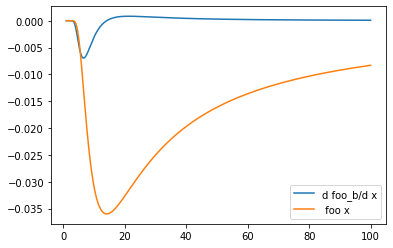

In [38]:
x = np.linspace(1.0, 100.0, 1000)
plt.plot(x, [db_sym(10,x) for x in x], label="d foo_b/d x")
plt.plot(x, [f(10,x) for x in x], label=" foo x")
plt.legend()

4. Implement a function for approximate numerical differentiation, given the difference size $h$.

In [273]:
def diff(f, x, h):
  """Differentiates f at x numerically, using h as the difference.
  """
  return (f(x + h) - f(x))/(h)


5. Find the best difference size $h$ for differentiating
   * $f(3, 10)$ by $a$.
   * $f(1, 1)$ by $b$.
   The best difference size minimizes the error of numerical differentiation relative to the exact differentiation.

In [274]:
def make_fxy(f, x, y):
    def fx(x):
        return f(x, y)
    def fy(y):
        return f(x, y)
    return fx, fy


# relative error = ( | measured - real | ) / real

In [275]:
#f(3,10) by a
a = 3.0
b = 10.0
best_h = 0
min_diff = 100

fx, fy = make_fxy(f, a, b)

ploting to show the minimum point:


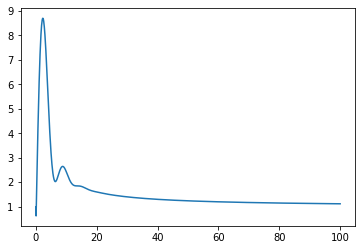

In [264]:
print("ploting to show the minimum point:")
x = np.linspace(0.0000000001, 100.0, 1000)
plt.plot(x, [abs((diff(fx,a,h) - da_sym(a,b))/da_sym(a,b)) for h in x], label="d foo_b/d x")

#trying to find best h by finding relative error

In [249]:
#calculating the best h
x = np.linspace(0.0000001, 0.001, 10000)
best_h = 0
min_diff = 100
for h in x:
  if(min_diff > abs(( diff(fx,a,h) - da_sym(a,b)) / da_sym(a,b))):
    min_diff = abs(( diff(fx,a,h) - da_sym(a,b)) / da_sym(a,b))
    best_h = h

print("the best difference size  h  for differentiating f(3,10) by a is:",'{0:.10f}'.format(best_h))
print("the best difference is:",min_diff,"\n")

the best difference size  h  for differentiating f(3,10) by a is: 0.0000679000
the best difference is: 2.38749036646054e-7 



#finding the best h using newton function



In [276]:
def newton(f, x0, niter=10):
  df = jax.grad(f)
  ddf = jax.grad(df)
  x = x0
  for i in range(niter):
    x = x - df(x)/ddf(x)
  return x

print(da_sym(a,b))

-0.00746868752819797


In [277]:
def func(h):
  return abs( (diff(fx,a,h) - -0.00746868752819797) / -0.00746868752819797)

best_h = newton(func,0.00000001,niter=10)
min_diff = func(best_h)
print("the best difference size  h  for differentiating f(3,10) by a is:",'{0:.10f}'.format(best_h))
print("the best difference is:",min_diff,"\n")

the best difference size  h  for differentiating f(3,10) by a is: 0.0000005766
the best difference is: 1.0 



In [286]:
#f(1,1) by b
a = 1.0
b = 1.0
best_h = 0
min_diff = 100

fx, fy = make_fxy(f, a, b)

ploting to show the minimum point:


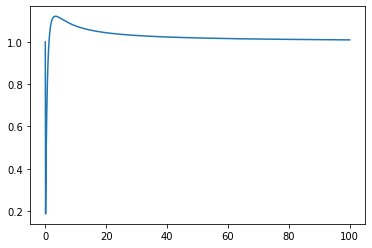

In [251]:
print("ploting to show the minimum point:")
x = np.linspace(0.0000000001, 100.0, 1000)
plt.plot(x, [abs((diff(fy,b,h) - db_sym(a,b))/db_sym(a,b)) for h in x], label="d foo_a/d x")

#trying to find best h by finding minimum relative error

In [307]:
x = np.linspace(0.0000001, 0.0001, 10000)
for h in x:
  if(min_diff > abs( (diff(fy,b,h) - db_sym(a,b) )/ db_sym(a,b))):
    min_diff = abs( (diff(fy,b,h) - db_sym(a,b) )/ db_sym(a,b))
    best_h = h

print("the best difference size  h  for differentiating f(1,1) by a is:",'{0:.10f}'.format(best_h))
print("the best difference is:",min_diff,"\n")


the best difference size  h  for differentiating f(1,1) by a is: 0.0000838146
the best difference is: 9.96730631121065e-9 



#finding the best h using newton function

In [298]:
print(db_sym(a,b))

0.198766110346413


In [308]:
def func(h):
  return abs( (diff(fy,b,h) - 0.198766110346413)/0.198766110346413 )

best_h = newton(func,0.0000001,niter=10)
min_diff = func(best_h)
print("the best difference size  h  for differentiating f(1,1) by a is:",'{0:.10f}'.format(best_h))
print("the best difference is:",min_diff,"\n")

the best difference size  h  for differentiating f(1,1) by a is: 0.0000057650
the best difference is: 0.0013077473 



## Question 2: Optimization

### Logistic regression

For a trial group of 20 rats, concentrations of poison in blood and the event of death are given as a list of pairs (concentration, death) (1 corresponds to death):



In [309]:
rats = [(0.47, 0), (0.23, 0), (0.86, 1), (0.22, 0), (0.21, 1),
        (0.31, 0), (0.62, 0), (0.941, 1), (0.27, 0), (0.35, 1),
        (0.18, 0), (0.13, 0), (0.31, 1), (0.99, 1), (0.85, 1), 
        (0.35, 1), (0.6, 1), (0.89, 1), (0.6, 1), (0.92, 0)]

We want to predict rat death based on the concentration of the poison. The prediction function is

$$death = concentration \ge threshold.$$

The loss for this _classification_ problem is:

\begin{equation}
\begin{aligned}
& L = -\sum_{i=1}^N (death_i \log p_i + (1 - death_i) \log (1 - p_i)) \\
\mbox{where} & \\
& p_i = \frac 1 {1 + \exp(threshold - concentration_i)}
\end{aligned}
\end{equation}

1. Implement the loss as a function of the threshold.

In [310]:
concentration = np.array([x[0] for x in rats])
death = np.array([x[1] for x in rats])
def loss(threshold):
  """computes loss of linear regression.
  """
  #pi = 1/(1 + np.exp(threshold - concentration))
  #err = -1*( ( death * np.log(pi) ) + ( (1-death)*np.log(1-pi) ) )
  #return (np.mean(-1*err))
  summerr = 0
  for i in range(len(rats)):
    pi = 1/(1 + np.exp(threshold - concentration[i]))
    err = ( ( death[i] * np.log(pi) ) + ( (1-death[i])*np.log(1-pi) ) )
    summerr += err
  return np.mean(-1*summerr)

2. Plot the loss and the derivative of the loss by the threshold in the range $threshold \in (0.01, 0.99)$.

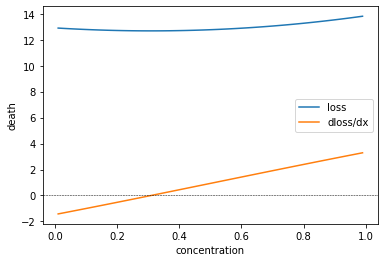

In [311]:
x = np.linspace(0.01, 0.99, 100)
dloss = jax.grad(loss)
plt.plot(x, [loss(x) for x in x], label="loss")
plt.plot(x, [dloss(x) for x in x], label="dloss/dx")
plt.xlabel("concentration")
plt.ylabel("death")
plt.axhline(0, lw=0.5, ls='dashed', color='black')
plt.legend()

3. Find the best threshold using gradient ascent.

In [312]:
def gd(f, x0, step=0.1, decay=0.995, niter=100):
  """approximates maximum of f starting from x0
  """
  df = jax.grad(f)
  x = x0
  for i in range(niter):
    x -= df(x)*step
    step *= decay
  return x

x = gd(loss, 0.30, niter=200)
print(f"x={x:.3f} loss({x:.3f})={loss(x):.3f}")

x=0.309 loss(0.309)=12.685


4. Find the best threshold using Newton's method.

In [313]:
def newton(f, x0, niter=10):
  df = jax.grad(f)
  ddf = jax.grad(df)
  x = x0
  for i in range(niter):
    x = x - df(x)/ddf(x)
  return x

x = newton(loss, 0.30, niter=10)
print(f"x={x:.8f} loss({x:.3f})={loss(x):.3f}")

x=0.30946714 loss(0.309)=12.685


5. Show actual vs. predicted deaths as a scatter plot for the best threshold. How many deaths were misclassified?

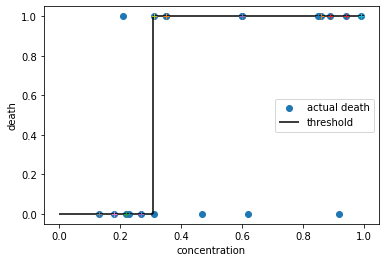

In [314]:
plt.scatter(concentration,death,label = 'actual death')
a = newton(loss, 0.31, niter=10)

plt.hlines(y=0.0, xmin = 0.0, xmax=a)
plt.vlines(x=a, ymin = 0.0, ymax=1.0,label='threshold')
plt.hlines(y=1.0, xmin = a, xmax=1.0)

count_clasified = 0
index = 0
while(index < len(concentration)):
  if(concentration[index] < a and death[index] != 1):
    plt.plot(concentration[index],death[index],marker='+')
    count_clasified += 1
  if(concentration[index] > a and death[index] == 1):
    plt.plot(concentration[index],death[index],marker='+')
    count_clasified += 1
  index = index + 1

misclassified_deaths = len(death) - count_clasified

plt.xlabel("concentration")
plt.ylabel("death")
plt.legend()


In [315]:
print(misclassified_deaths,"deaths were misclassified.")

5 deaths were misclassified.
